## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 4.8: Equilibrium dust temperature as a function of grain size
#### (note this differs from the published figure slightly due to the use of a different solver)

#### uses miepython.py from https://pypi.org/project/miepython/

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from astropy import units as u
from astropy import constants as c
from astropy.modeling.models import BlackBody
from scipy.optimize import fsolve
%matplotlib inline

In [168]:
import sys
!{sys.executable} -m pip install miepython
import miepython as mp

In [169]:
def qabs(m,x):
    qext, qsca, qback, g = mp.mie(m,2*np.pi*x)
    return(qext - qsca)

In [210]:
def Tdust(L=1,d=1):
    # L in solar units
    # d in parsecs
    G = (L*u.L_sun)/(4*np.pi * (d*u.pc)**2)
    G4pi = (G/(4*np.pi*u.sr)).cgs.value

    # Habing field
    G0 = 1.6e-3 * u.erg / u.s / (u.cm)**2
    T_bb = (L*u.L_sun/(16*np.pi*c.sigma_sb*(d*u.pc)**2))**0.25
    print("Radiation field = {0:5.2f} Habings".format((G/G0).cgs))
    print("Blackbody temperature = {0:5.2f}".format(T_bb.cgs))
    
    # cosmic background (adds to grain temperature illuminated by starlight)
    T_cbr = 2.73

    # fairly coarse wavelength range for integration
    wl = np.logspace(0.5,3.5,num=30)[::-1] * u.micron
    nu = c.c/wl

    # particle size
    a = np.logspace(-2,4,num=30) * u.micron
    Td = np.zeros(a.size)

    # index of refraction
    m = 1.3 - 0.05j

    # for each grain size, calculate qabs(a/lambda), integrate over emission, and find equilibrium temperature
    for j,a1 in enumerate(a):
        x = (a1/wl).value
        q = np.where(x<5, qabs(m,x), 1)
        
        # we need to find the zero of this equation
        f = lambda y: (np.trapz(BlackBody(temperature=y*u.K)(nu)*q, nu).cgs.value/G4pi - 1)
        Tsolve = fsolve(f, 10.0)
        print("{0:.3f} {1:5.2f}K".format(a1, Tsolve[0]))
        
        # add cosmic background
        Td[j] = T_cbr + Tsolve

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)

    ax.plot(a, Td, 'k', lw=3)
    ax.set_xlim(0.01,10000.0)
    ax.set_ylim(3,30.0)
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlabel(r'$a\ (\mu m)$', fontsize=16)
    ax.set_ylabel(r'$T_{gr}\ (K)$', fontsize=16)

    # nicer y axis labels
    ax.set_yticks([3,4,6,10,20,30])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_tick_params(which='minor', size=0)
    ax.get_yaxis().set_tick_params(which='minor', width=0)
    
    plt.savefig('Tdust.pdf')

Radiation field =  1.00 Habings
Blackbody temperature =  1.63 K
0.010 micron 20.53K
0.016 micron 18.66K
0.026 micron 16.96K
0.042 micron 15.42K
0.067 micron 14.02K
0.108 micron 12.75K
0.174 micron 11.59K
0.281 micron 10.54K
0.452 micron  9.58K
0.728 micron  8.71K
1.172 micron  7.92K
1.887 micron  7.20K


/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


3.039 micron  6.54K


/anaconda/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


4.894 micron  5.95K
7.880 micron  5.41K
12.690 micron  4.91K
20.434 micron  4.46K
32.903 micron  4.05K
52.983 micron  3.66K
85.317 micron  3.30K
137.382 micron  2.97K
221.222 micron  2.68K
356.225 micron  2.42K
573.615 micron  2.20K
923.671 micron  2.03K
1487.352 micron  1.90K
2395.027 micron  1.81K
3856.620 micron  1.75K
6210.169 micron  1.74K
10000.000 micron  1.76K


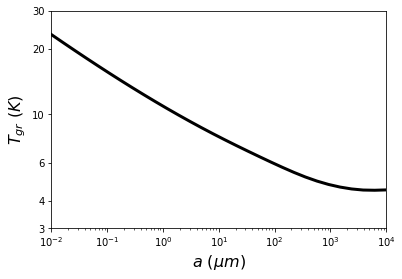

In [213]:
# one Habing field
Tdust(50,1)

# ten Habing fields
#Tdust(500,1)